모델 내부에는 Relu 를 많이 사용하고

out 할때는 tanh, softmax, linear를 사용한다. 

hidden layer를 늘리면 parameter가 기하급수적으로 증가하는 문제가 발생한다(즉, 트레이닝이 어려워지는 문제)

딥러닝 공부

1. 모델에 대한 공부
</br>
2. 트레이닝 기법에 대한 공부
- 역전파 알고리즘(chain rules)
    - _**underfiiting**_ 해결 (vanishing gradient)  
    활성함수를 조정하여 Vanishing Gradient를 변경하였다.  
    `대표적으로 (Relu)`

- 초기값 설정문제
 - Xavier : sigmoid, tanh
 - He : Relu

- DroOut
    - overfitting 문제의 해결  
```
각 layer마다 일정 비율의 뉴런을 "임의로" drop
```

- 최적화 알고리즘  
경사 하강법을 사용하는데 그 경사하강법을 발전
    1. 속도
    - mini Batch Gradient Desent
    - Batch Gradient Desent
    - Stochastic Gradient Desent

    2. 방향성
    - _momentum_! 계열
    - _Adagrad_ 계열
    > 합쳐서 Adam을 많이 사용한다.

전체 배치(Batch)를 한 번 행하는것을 **epoch**라고 한다.



In [2]:
import tensorflow as tf

In [3]:
# numpy --> ndarray
# tf --> tenser
# pytorch, scipy

In [4]:
tensor = tf.constant(3) # 상수(고정값)
tensor

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [5]:
tf.constant([3, 4, 5])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

In [6]:
tenser2 = tf.constant([[3, 4, 5],
            [1, 2, 3]])
tenser2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 4, 5],
       [1, 2, 3]], dtype=int32)>

In [7]:
## tensor => numpy 로 바꾸기
tenser2.numpy()

array([[3, 4, 5],
       [1, 2, 3]], dtype=int32)

In [8]:
tenser3 = tf.constant([
    [[1, 2, 3],
    [4, 5, 6]],
    [[7, 8, 9],
    [1, 2, 3]]
    ])
tenser3

# 2차원 2행 3열

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[1, 2, 3],
        [4, 5, 6]],

       [[7, 8, 9],
        [1, 2, 3]]], dtype=int32)>

In [9]:
tenser3.numpy()

array([[[1, 2, 3],
        [4, 5, 6]],

       [[7, 8, 9],
        [1, 2, 3]]], dtype=int32)

## 퍼셉트론의 구현

In [10]:
hand = 2
face = 3

w1, w2, b = 1, 1, 0 # 초기 weight 설정 (맘대로)

In [11]:
z = hand * w1 + face * w2 + b # 선형모델
z

5

#### Numpy 로 내적하기

In [12]:
import numpy as np

In [13]:
X = np.array([hand, face, 1]) # 마지막이 1인 이유는 bias 이기 때문
W = np.array([w1, w2, b])
z = X@W.T # np.dot(X, W.T)

z, X.shape, W.T.shape

(5, (3,), (3,))

#### tensorflow 로 내적하기

In [14]:
X = tf.constant([hand, face, 1])
W = tf.constant([w1, w2, b])

print(X.shape, W.shape)


X@tf.transpose(W) ## transpose 를 하는 방법의 차이가 있다. 차원이 맞지 않는 다는 에러

(3,) (3,)


InvalidArgumentError: ignored

In [16]:
## 맞는 답

X = tf.constant([[hand, face, 1]]) # 여기서 차이가 난다. 대괄호가 2개 
W = tf.constant([[w1, w2, b]]) 

print(X.shape, W.shape, tf.transpose(W).shape)


# X@tf.transpose(W) => ! 잘 안씀
tf.matmul(X, W, transpose_b=True) # 뒤에 있는것을 transpose를 적용하여 곱해라
## output 이 tensor 2D ==> !! 제일 중요

(1, 3) (1, 3) (3, 1)


<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[5]], dtype=int32)>

In [17]:
X = tf.constant([hand, face, 1])
W = tf.constant([w1, w2, b])

tf.tensordot(X, W, axes=1) # output 이 scalar 0D !! 상황에 따라 중요

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [18]:
## tensor 의 변수 선언

v = tf.Variable([3, 4], dtype = tf.float32)
## dtype을 변경하는 이유 ==> Variable은 모델의 parmeter로 많이 사용 : float 로 사용해야 에러가 나지 않는다 
v

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([3., 4.], dtype=float32)>

constant와 variable

tensor basic을 배우는 이유
라이브러리나 모델링 과정에서는 잘 안쓰게 될 수도 있다.
논문에 있는 코드를 구현하거나 라이브러리에서 제공해주지 않는 기능을 구현 Or 커스텀한 loss 구조를 위해서 tensor basic을 
알아야 한다.

#### Rank와 Shape

In [19]:
a = tf.constant(10)
b = tf.constant(5, dtype = tf.float32) # tf.contant(5.) 과 같다.
c = tf.constant([1. , 2.])
d = tf.constant([[1., 2.],
                 [3, 4]]) # 숫자 하나만 float 이면 전체를 인식
print(a, b)
print(c)
print(d)

tf.Tensor(10, shape=(), dtype=int32) tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor([1. 2.], shape=(2,), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [20]:
tf.rank(a), tf.rank(b), tf.rank(c), tf.rank(d)

## 차원 개념이 rank 라고 생각하자

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [21]:
a.shape, b.shape, c.shape, d.shape

(TensorShape([]), TensorShape([]), TensorShape([2]), TensorShape([2, 2]))

#### Operator 연산자

In [22]:
a = tf.constant(10)
a = a+3
# a += 3
a

<tf.Tensor: shape=(), dtype=int32, numpy=13>

In [23]:
a = tf.cast(a, tf.float32) # 데이터 타입의 변환
## int --> float32, float32--> float64, float32 --> float16
a 

<tf.Tensor: shape=(), dtype=float32, numpy=13.0>

In [24]:
a+b

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

In [25]:
# a + b
tf.add(a, b) # 모델 내부에서는 gradient 추적이나 모델 최적화를 위해 이렇게 사용하는걸 추천한다.

## 주의 연산하는 두 값의 자료형이 같지 않으면 error 발생

<tf.Tensor: shape=(), dtype=float32, numpy=18.0>

In [26]:
# a - b
tf.subtract(a, b)

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [27]:
# d/a
tf.divide(d, a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.07692308, 0.15384616],
       [0.23076923, 0.30769232]], dtype=float32)>

In [28]:
# a*b

tf.multiply(a, b)

<tf.Tensor: shape=(), dtype=float32, numpy=65.0>

In [29]:
## 딥러닝에서 자주 사용되는 중요한 operator ##

# add(sub), multiply(element-wise 곱), matmul(행렬 곱)

In [30]:
c = tf.constant([1, 2])
d = tf.constant([3., 4.])

c + d # error : Dtpye이 달라서 연산이 되지 않음

InvalidArgumentError: ignored

In [31]:
c + tf.cast(d, dtype = tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [32]:
d + tf.cast(c, dtype = tf.float32)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [33]:
tensor = tf.range(3, 33, 5)
tensor

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 3,  8, 13, 18, 23, 28], dtype=int32)>

In [34]:
e = tf.constant([[1, 2, 3], [4, 5, 6]])
e.shape

TensorShape([2, 3])

In [35]:
tf.reshape(e, [-1, 2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [36]:
tf.linspace(1, 10, 21) # start, end, num

<tf.Tensor: shape=(21,), dtype=float64, numpy=
array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
        5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
        9.1 ,  9.55, 10.  ])>

In [37]:
tf.zeros((3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [38]:
tf.ones((2, 2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [39]:
e = tf.reshape(tf.range(0., 30.), [2, 3, 5])
e

<tf.Tensor: shape=(2, 3, 5), dtype=float32, numpy=
array([[[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.]],

       [[15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.]]], dtype=float32)>

In [40]:
tf.reduce_sum(e) # all elements 의 sum

<tf.Tensor: shape=(), dtype=float32, numpy=435.0>

In [41]:
tf.reduce_sum(e, axis = 2) ## [2, 3, 5] --> 5가 있는 축 
## 차원이 줄어들었다

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 10.,  35.,  60.],
       [ 85., 110., 135.]], dtype=float32)>

In [42]:
tf.reduce_sum(e, axis = 2, keepdims = True) # 차원을 유지 시켜줌

<tf.Tensor: shape=(2, 3, 1), dtype=float32, numpy=
array([[[ 10.],
        [ 35.],
        [ 60.]],

       [[ 85.],
        [110.],
        [135.]]], dtype=float32)>

reduce_sum 은 custom loss 를 구현할 때 많이 사용

#### random

- 노이즈나 랜덤한 상태를 추가할 때
- Custom 한 init을 적용할때

In [43]:
tf.random.normal((3, 3)) # nomal 정규 분포로 random 수 생성

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.6774615 ,  2.5604615 , -0.68924224],
       [-0.5367934 , -0.1580033 ,  1.1354223 ],
       [ 0.99506783, -1.5749569 ,  0.5801664 ]], dtype=float32)>

In [44]:
tf.random.uniform((4, 4))

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.4010936 , 0.9366536 , 0.97096753, 0.7452507 ],
       [0.08266997, 0.7850666 , 0.21762633, 0.04833627],
       [0.88179994, 0.24588919, 0.11995411, 0.6743243 ],
       [0.01571691, 0.6258377 , 0.6443628 , 0.21880758]], dtype=float32)>

## 간단한 모델 구현하기

In [45]:
# 6월 모의고사, 9월모고 토대로 수능 점수 예측

# data

mon6, mon9, final = 85., 100., 95.

# 가설(선형모델) : final = w1*mon6 + w2*mon9 + b
# 초기 weight 성정

w1 = tf.Variable(0.1)
w2 = tf.Variable(0.2)
b = tf.Variable(-0.5) 

# Cost Function --> Custom

def myCost():
    y_pred = w1*mon6 + w2*mon9 + b
    
    # mse = (실제 - 예측)^2
    loss =  tf.square(final - y_pred)
    return loss

# optimizer

opt = tf.keras.optimizers.Adam(learning_rate = 0.1)

EPOCH = 100

for i in range(EPOCH):
    opt.minimize(myCost, var_list = [w1, w2, b])
    print(f"Epoch : {i} - Loss : {myCost().numpy()} - w1 : {w1.numpy()} - w2 : {w2.numpy()} - b : {b.numpy()}")

Epoch : 0 - Loss : 2342.572021484375 - w1 : 0.19999933242797852 - w2 : 0.29999932646751404 - b : -0.400000661611557
Epoch : 1 - Loss : 911.5352783203125 - w1 : 0.2978944182395935 - w2 : 0.39789441227912903 - b : -0.302105575799942
Epoch : 2 - Loss : 166.21168518066406 - w1 : 0.3909015655517578 - w2 : 0.49090152978897095 - b : -0.2090984433889389
Epoch : 3 - Loss : 7.273307800292969 - w1 : 0.4747145473957062 - w2 : 0.5747145414352417 - b : -0.12528544664382935
Epoch : 4 - Loss : 242.08953857421875 - w1 : 0.5438668131828308 - w2 : 0.643866777420044 - b : -0.0561332032084465
Epoch : 5 - Loss : 615.142333984375 - w1 : 0.5935595035552979 - w2 : 0.693559467792511 - b : -0.006440520286560059
Epoch : 6 - Loss : 905.064453125 - w1 : 0.6219585537910461 - w2 : 0.7219585180282593 - b : 0.021958542987704277
Epoch : 7 - Loss : 1004.2141723632812 - w1 : 0.6305878758430481 - w2 : 0.7305878400802612 - b : 0.03058786317706108
Epoch : 8 - Loss : 915.0601806640625 - w1 : 0.6228492856025696 - w2 : 0.722849

In [46]:
## 예측

w1*mon6 + w2*mon9 + b

<tf.Tensor: shape=(), dtype=float32, numpy=95.2809>

In [47]:
## 실제
final

95.0

## 간단한 모델 2

In [48]:
import random
import numpy as np

a, b = 2, -5
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = a*X + b + rng.randn(50) # noise 추가

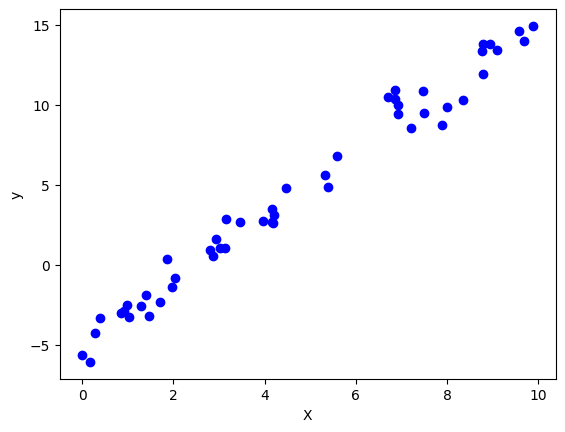

In [49]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## 선형 데이터

In [50]:
# w1 = tf.Variable(0.1)
# w2 = tf.Variable(0.2)
# b = tf.Variable(-0.5)

# # Cost Function
# def myCost():
#     # 예측값
#     y_pred = w1*mon6 + w2*mon9 + b 

#     # Loss (실제값 - 예측값)^2 
#     loss = tf.square(final-y_pred)
#     return loss 

# # optimzer 
# opt = tf.keras.optimizers.Adam(learning_rate = 0.1)

In [51]:
a = tf.Variable(random.random())
b = tf.Variable(random.random())
## tensorflow 에서 상수와 변수의 큰 차이는 간단하게 model 의 parameter로 사용할 수 있냐 없냐의 차이입니다.
## constant는 업데이트 되지 않습니다.

def compute_loss():
    y_pred = a*X + b # 활성함수가 linear인 단일 퍼셉트론(인공신경망)

    # MSE
    error = y - y_pred
    loss = tf.reduce_sum(error**2) # custom loss (평균을 구하지 않아도 작아지는 것만 확인하면 되니까)
    return loss

## reduce_sum vs reduce_mean ??
    # sum : 데이터의 개수가 늘어날 수록 그 값은 점점 커진다. 
    # mean : 배치사이즈에 상관없이 비슷한 값이 나온다
    # --> 학습은 sum이든, mean 이든 감소하는 방향으로 하긴 하지만, 데이터의 사이즈에 따른 차이가 있다.


# optimzer 
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)


EPOCH = 300
for i in range(EPOCH):
    opt.minimize(compute_loss, var_list = [a, b])
    print(f"Epoch : {i}\
         - Loss : {myCost().numpy()} \
         - a : {a.numpy()} \
         - b : {b.numpy()}")

Epoch : 0         - Loss : 0.45255470275878906          - a : 0.043308380991220474          - b : 0.25354820489883423
Epoch : 1         - Loss : 0.46610164642333984          - a : 0.053305670619010925          - b : 0.2635442018508911
Epoch : 2         - Loss : 0.47984835505485535          - a : 0.06329865008592606          - b : 0.2735337018966675
Epoch : 3         - Loss : 0.4937734007835388          - a : 0.07328540831804276          - b : 0.2835138440132141
Epoch : 4         - Loss : 0.5078758597373962          - a : 0.08326422423124313          - b : 0.2934819459915161
Epoch : 5         - Loss : 0.5221658945083618          - a : 0.09323332458734512          - b : 0.3034352660179138
Epoch : 6         - Loss : 0.5366206169128418          - a : 0.1031908392906189          - b : 0.313370943069458
Epoch : 7         - Loss : 0.5512500405311584          - a : 0.11313499510288239          - b : 0.32328614592552185
Epoch : 8         - Loss : 0.5660303235054016          - a : 0.123063981533

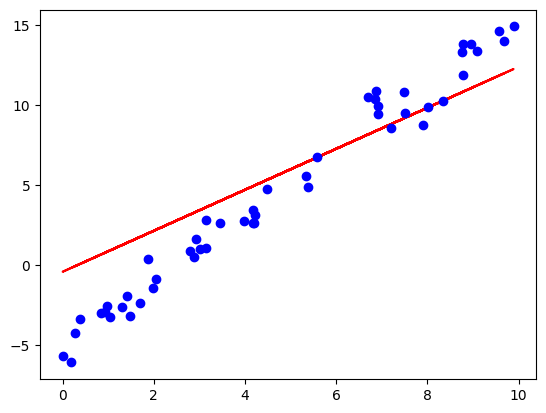

In [52]:
# plt.plot(np.arange(min(X), max(X), 0.01), a*np.arange(min(X), max(X), 0.01)+b , 'r-')
plt.plot(X, a*X+b , 'r-')
plt.plot(X, y, 'bo')
plt.show()